In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [38]:
data.shape

(506, 14)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [40]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
pip install klib

In [42]:
import klib
klib.cat_plot(data)

No columns with categorical data were detected.


In [43]:
klib.corr_mat(data)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

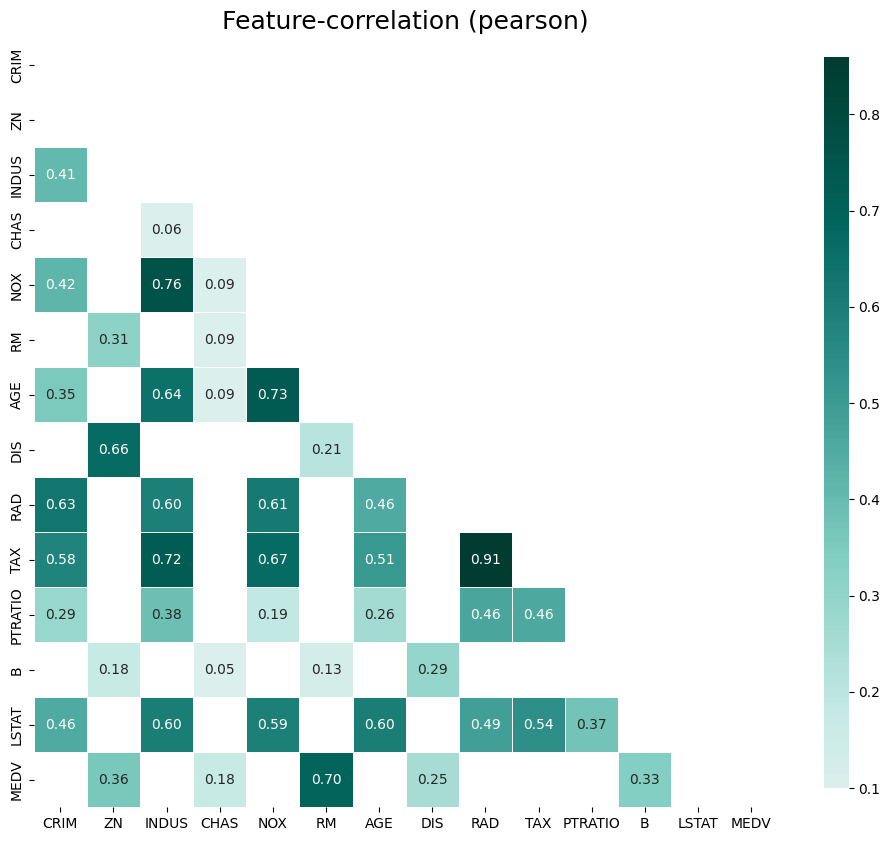

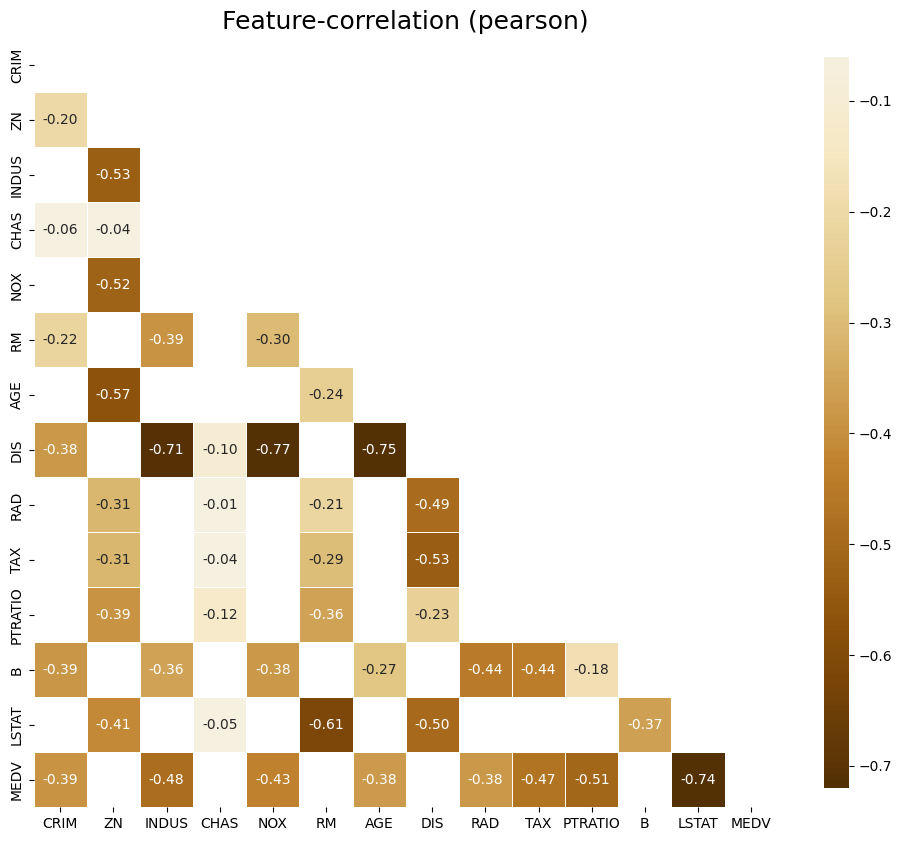

In [44]:
klib.corr_plot(data, split='pos') # displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(data, split='neg') # displaying only negative correlations

<Axes: title={'center': 'Feature-correlation (pearson)'}>

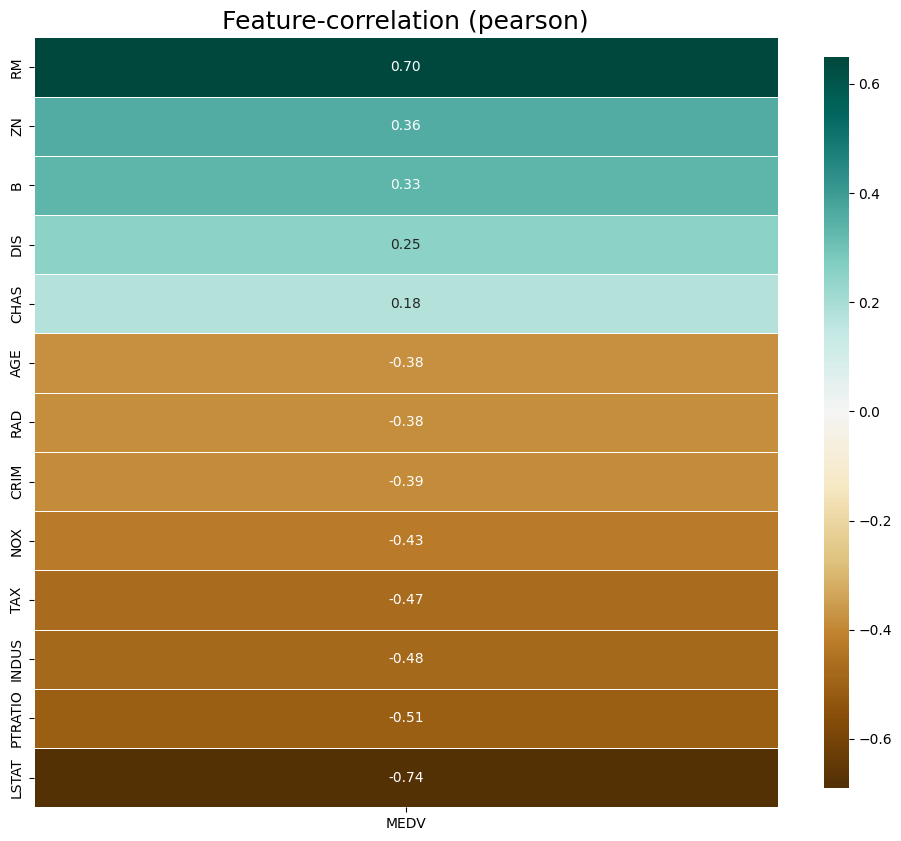

In [45]:
klib.corr_plot(data, target='MEDV') # default representation of correlations with the feature column


# 1. Linearity

In [46]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


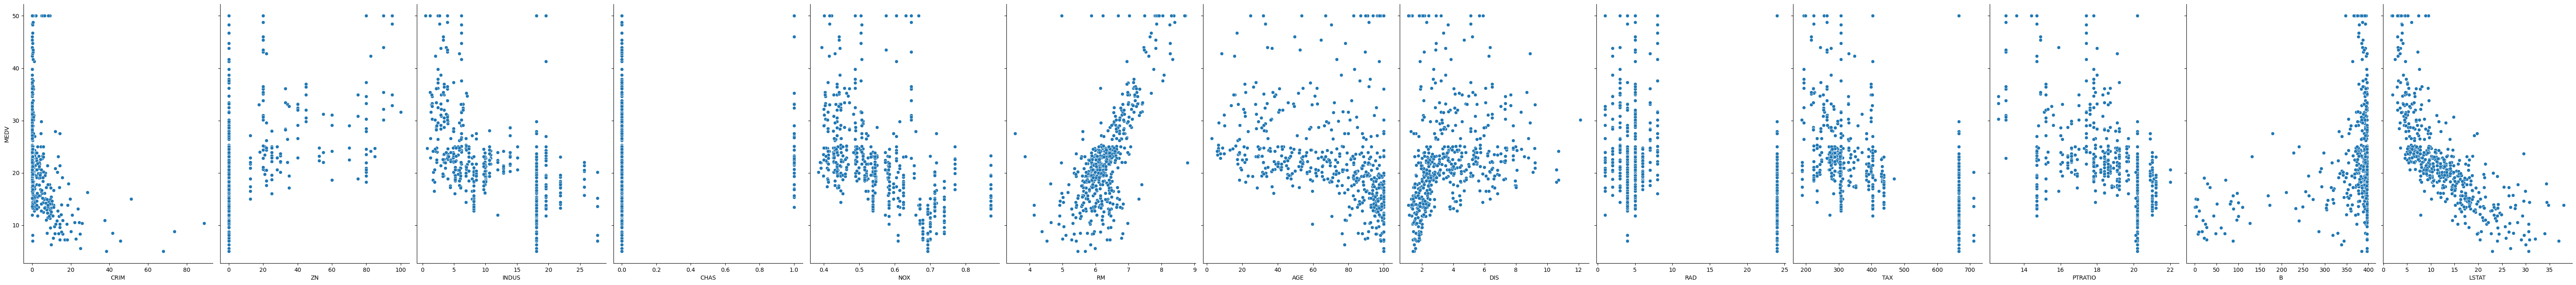

In [47]:
p = sns.pairplot(data, x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'], y_vars='MEDV', size=7, aspect=0.7)


['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


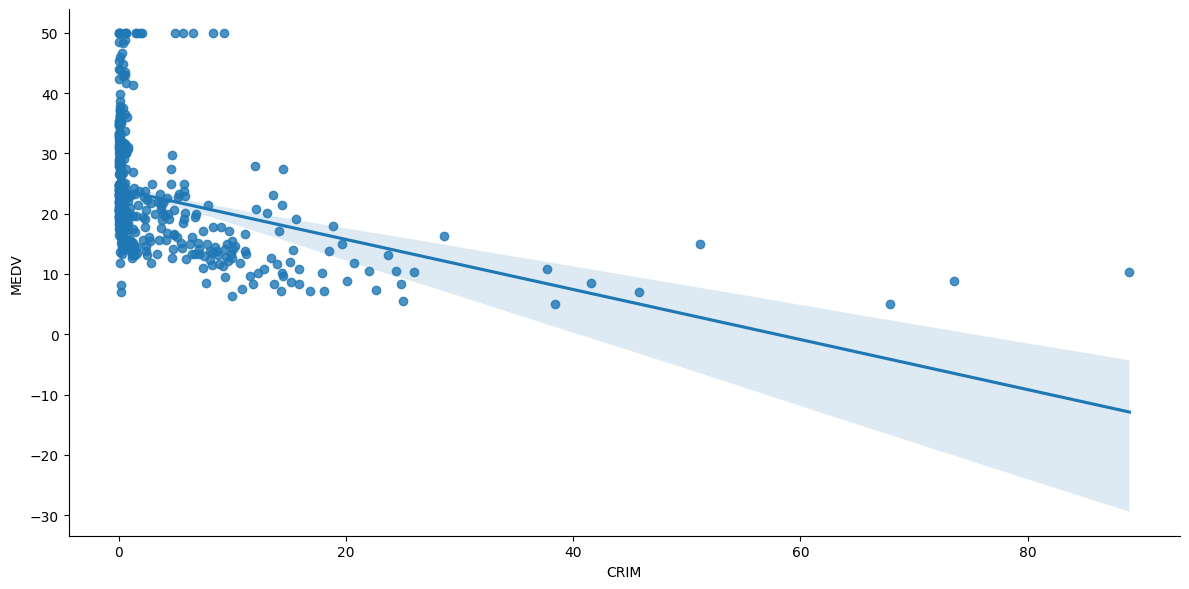

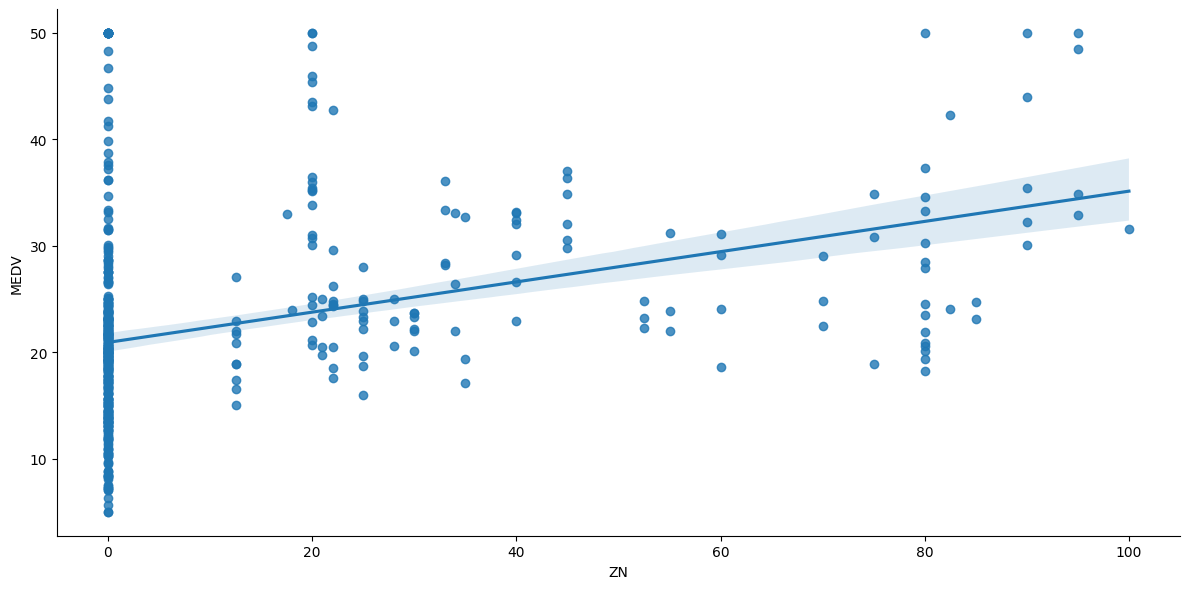

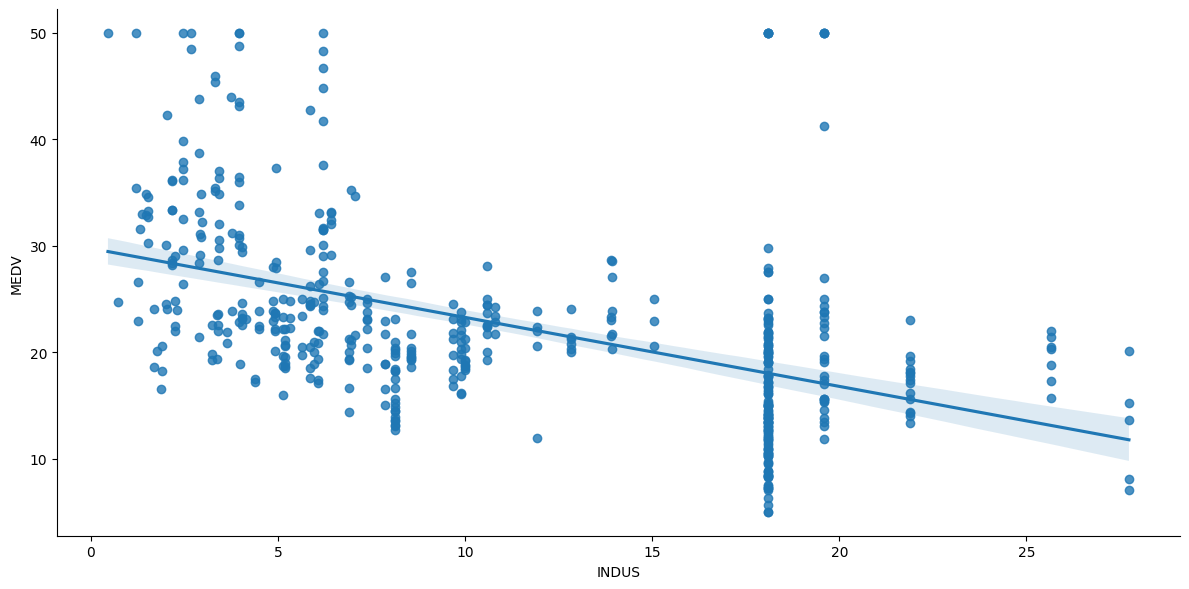

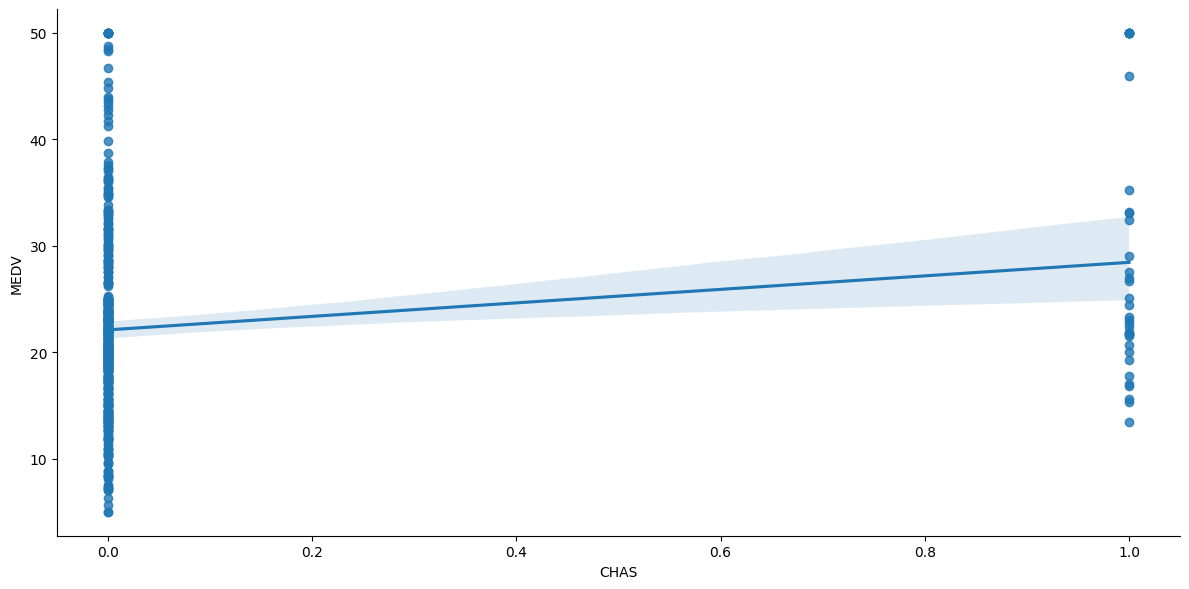

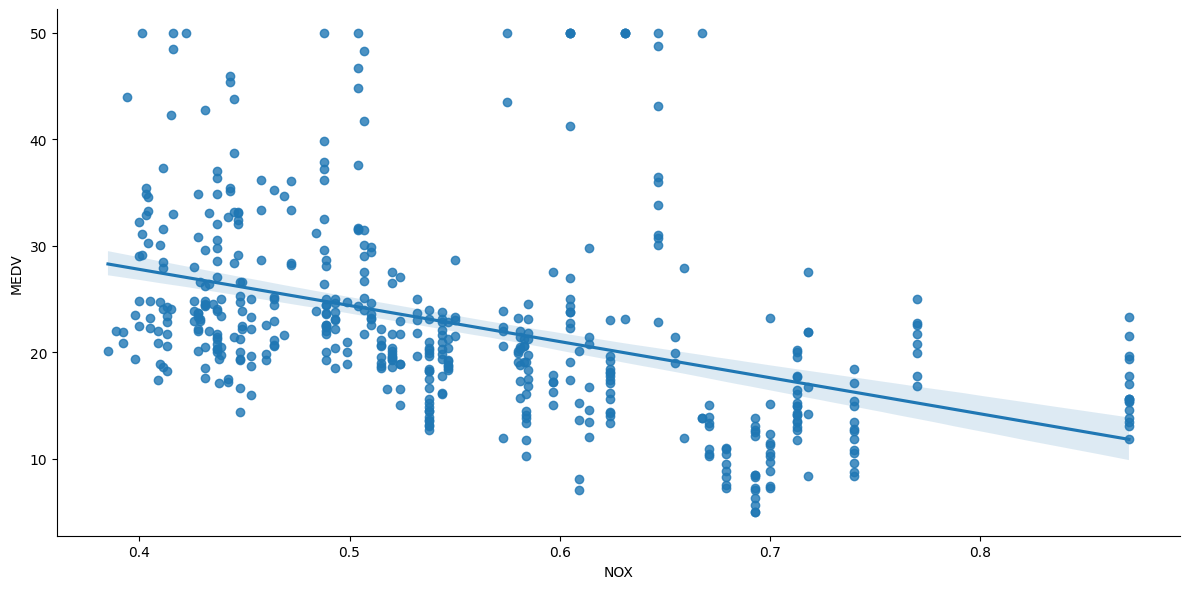

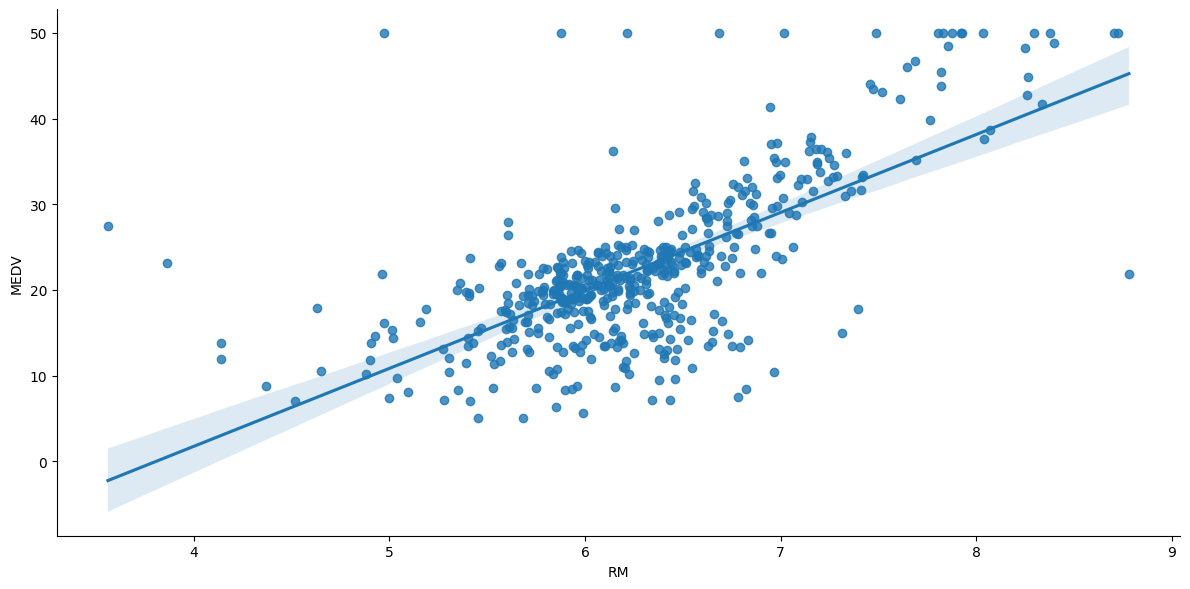

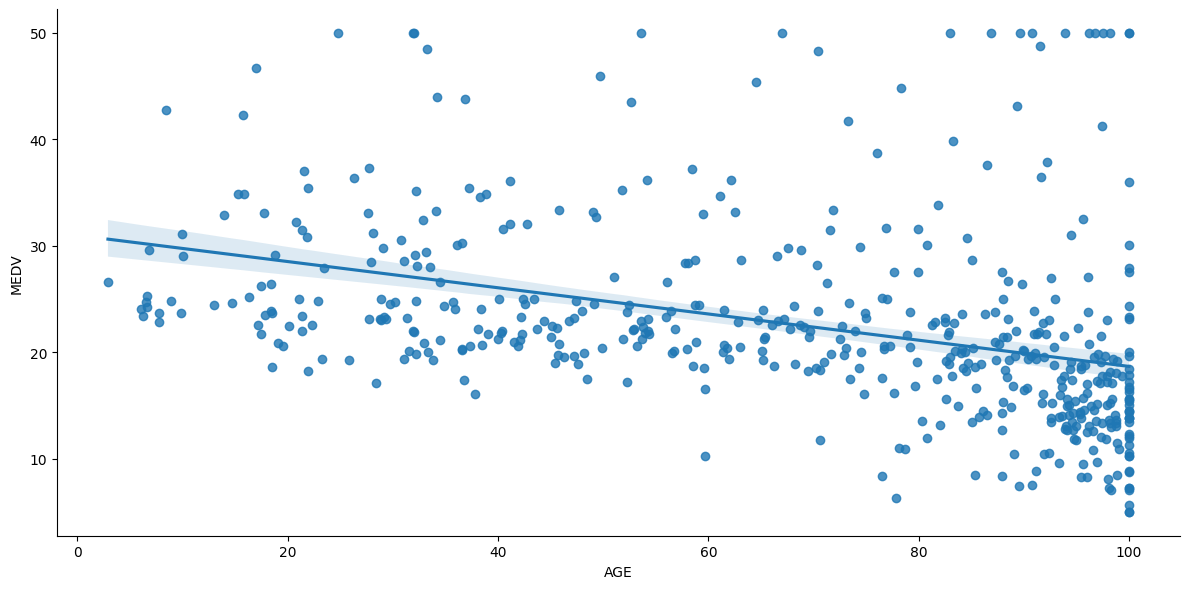

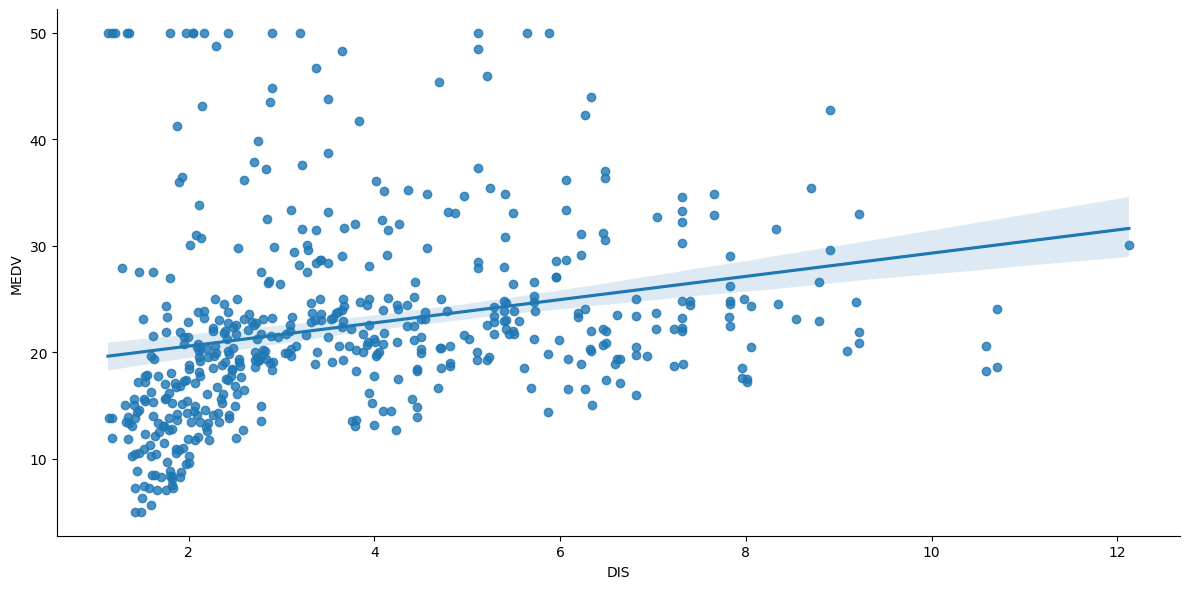

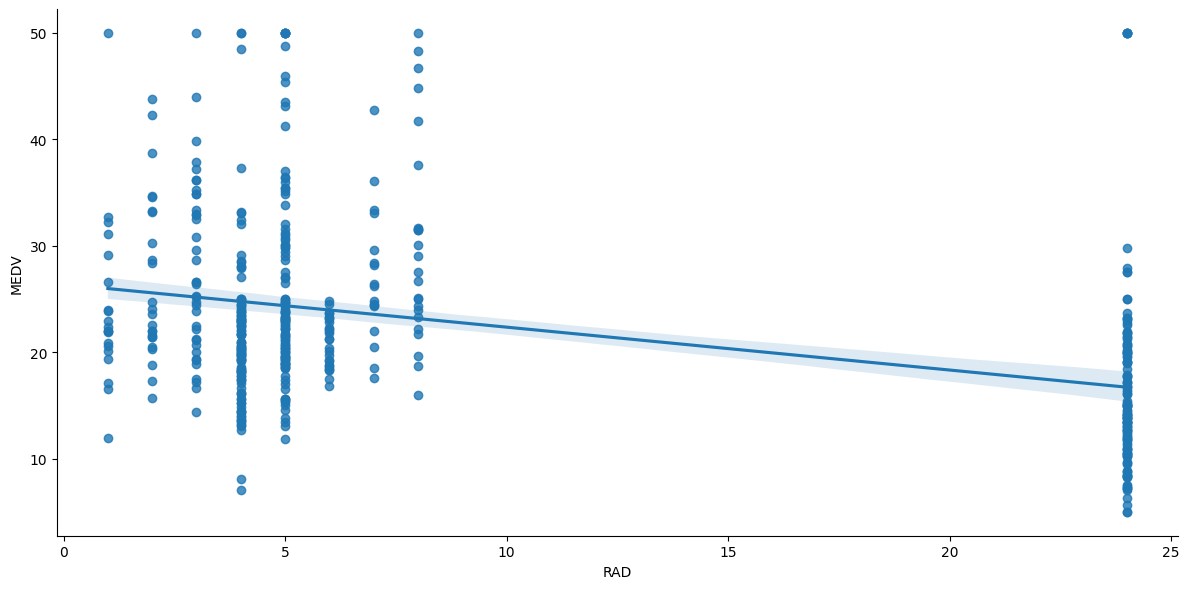

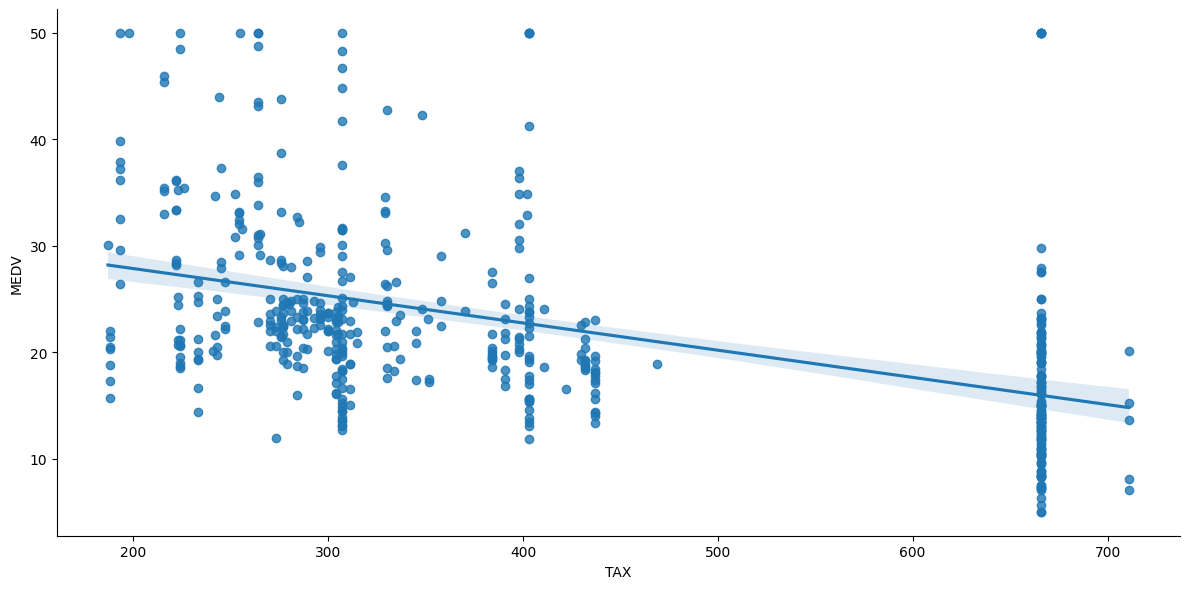

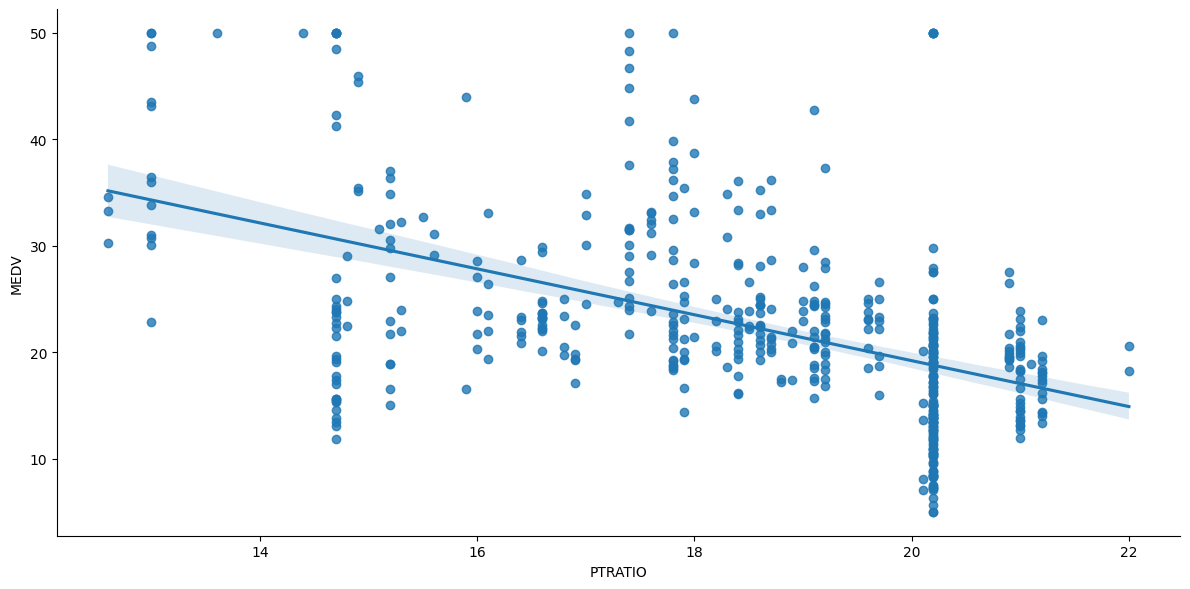

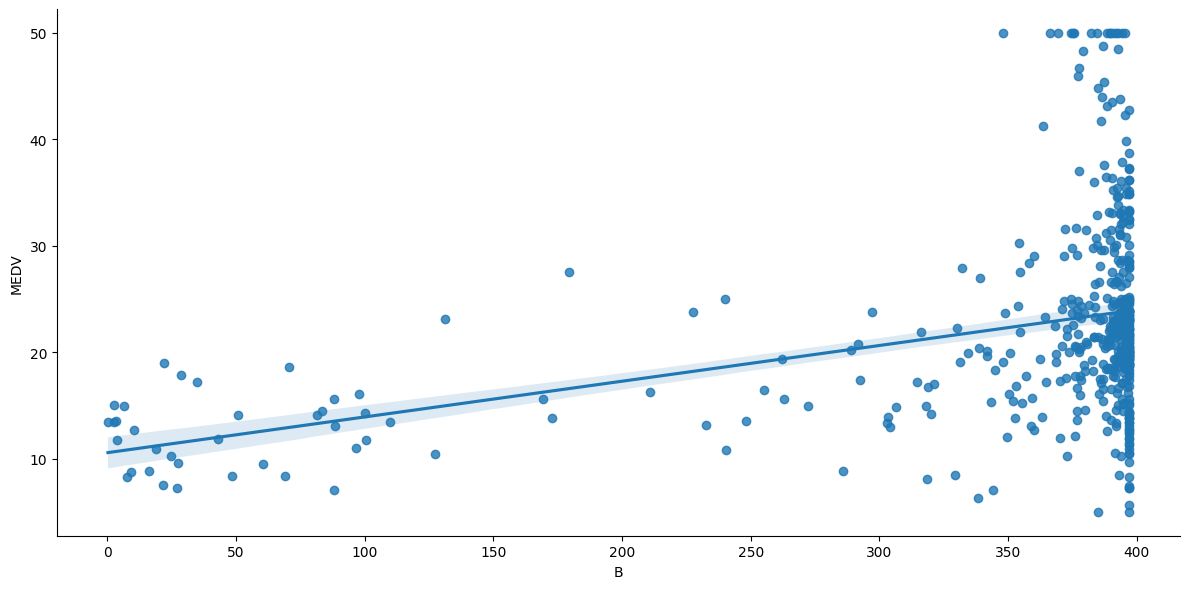

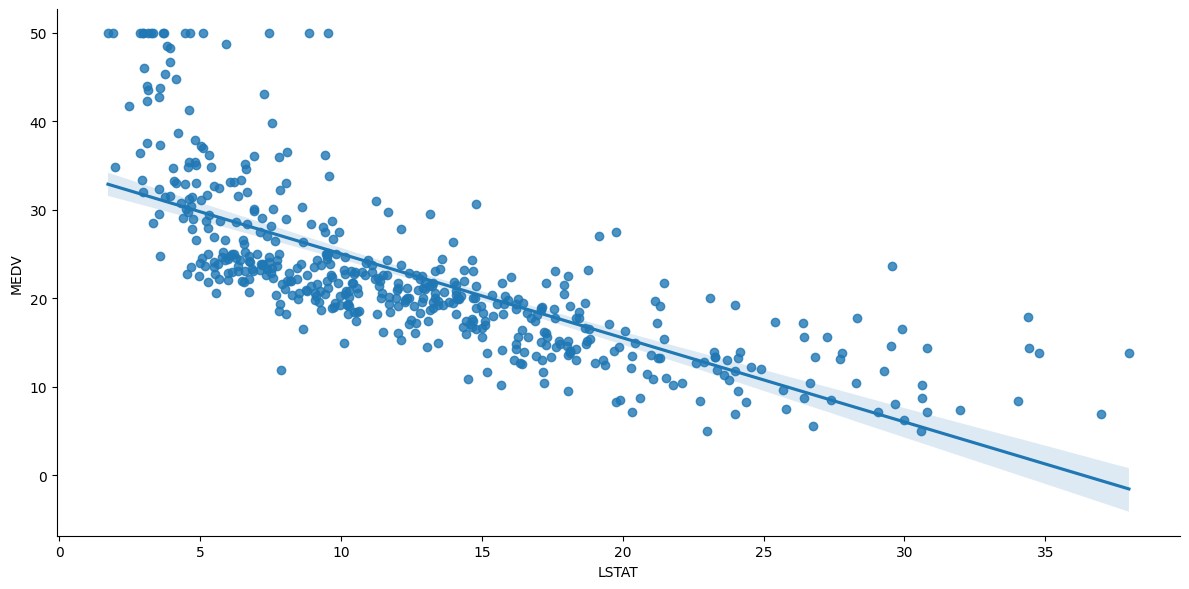

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace this with your actual data or load your dataset

# Set the constant y variable
y_variable = 'MEDV'

# Get a list of x variables excluding the y variable
x_variables = [col for col in data.columns if col != y_variable]
print(x_variables)
# Set up the matplotlib figure
#fig, axes = plt.subplots(nrows=len(x_variables), figsize=(10, 5 * len(x_variables)))

# Loop through each x variable and create an lmplot
for i, x_var in enumerate(x_variables):
    sns.lmplot(x=x_var, y=y_variable, data=data, aspect=2, height=6)
    plt.show()

# Adjust layout
#plt.tight_layout()


# Normality

<Axes: xlabel='CRIM', ylabel='Density'>

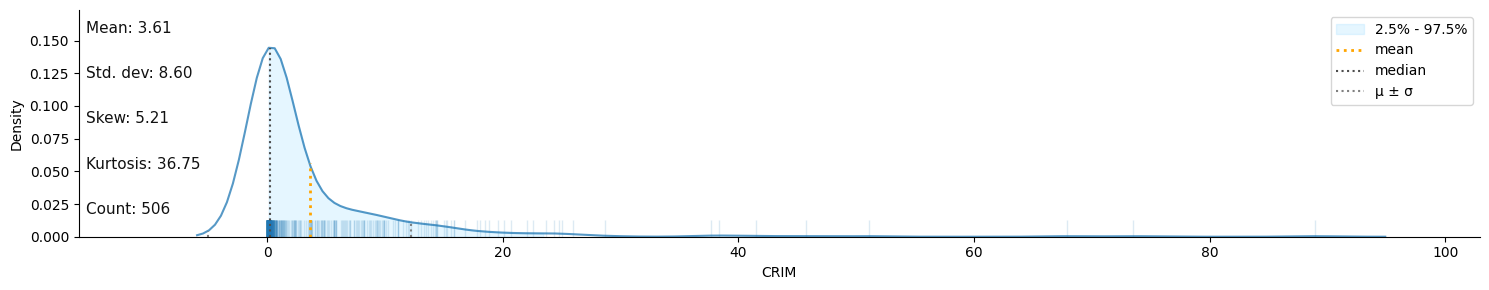

In [54]:
klib.dist_plot(data.CRIM) # default representation of a distribution plot, other settings include fill_range, histogram, ...


No columns with numeric data were detected.


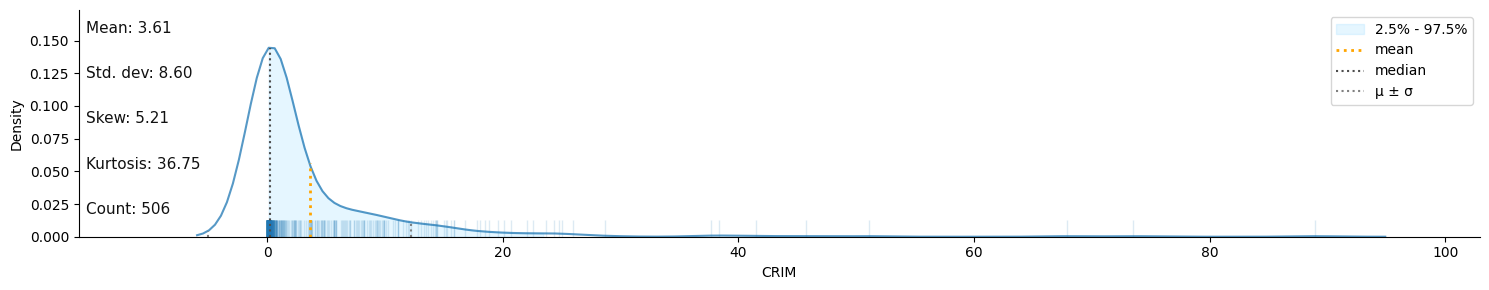

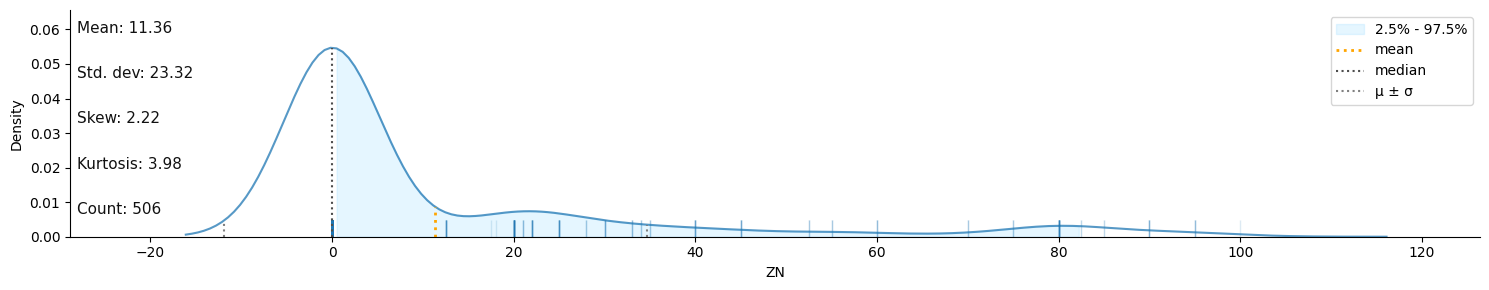

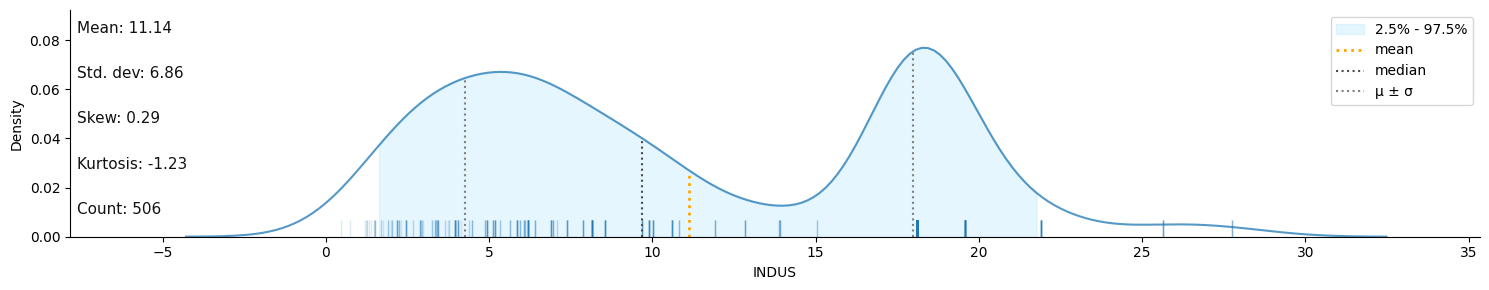

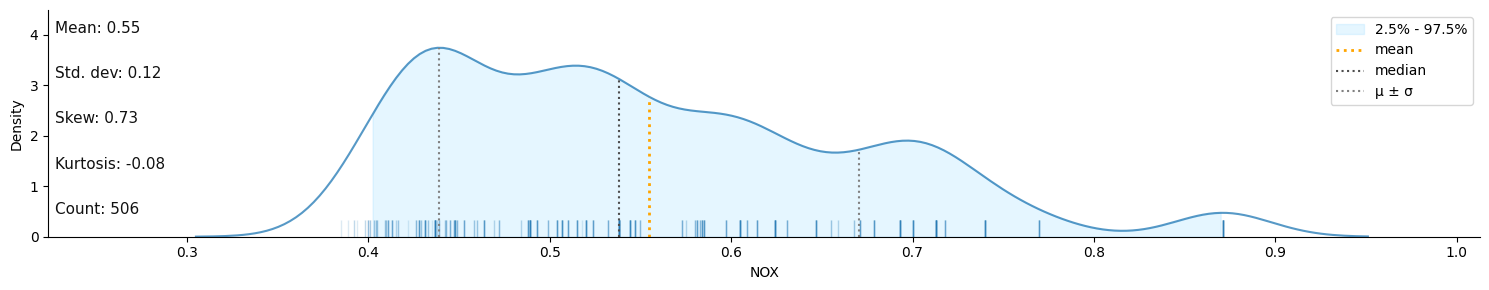

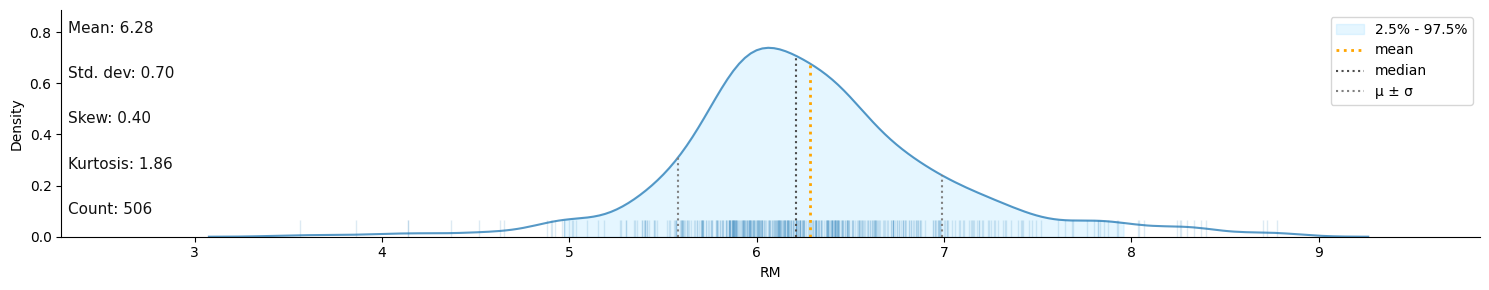

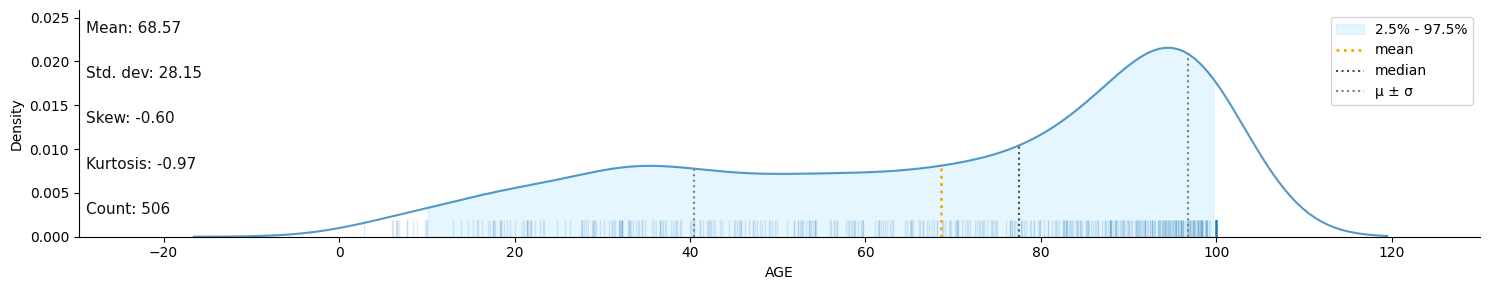

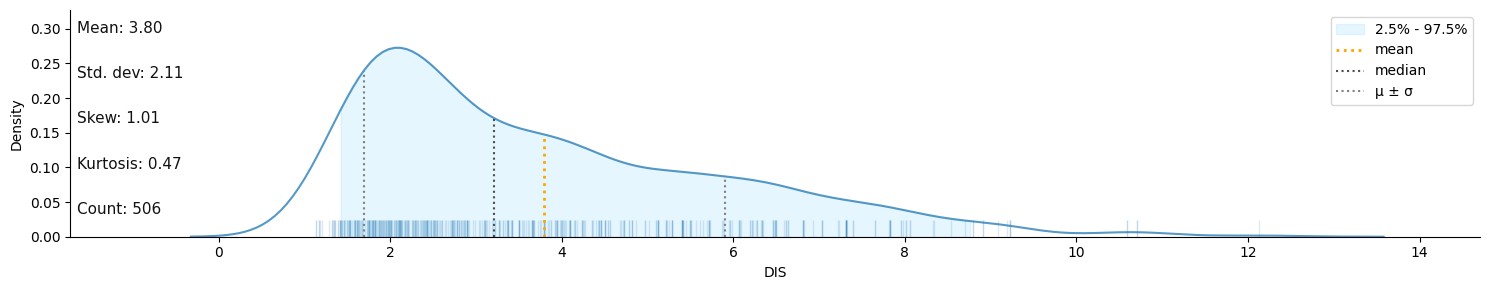

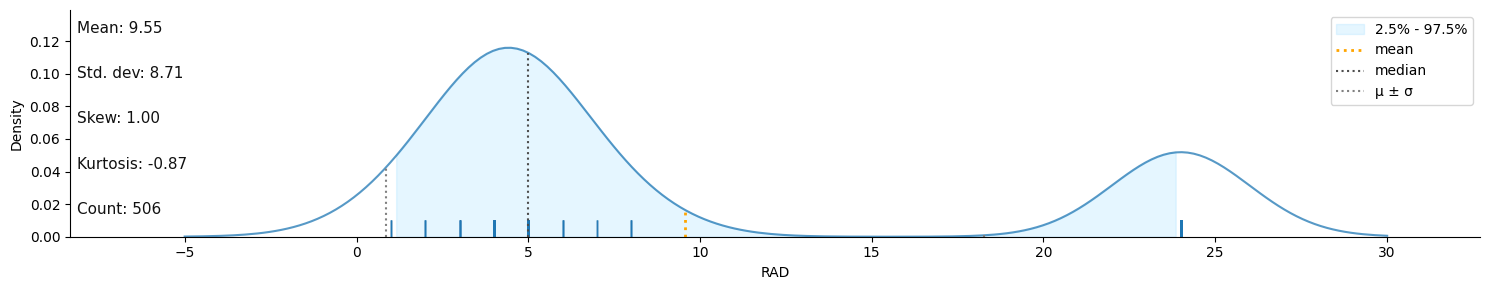

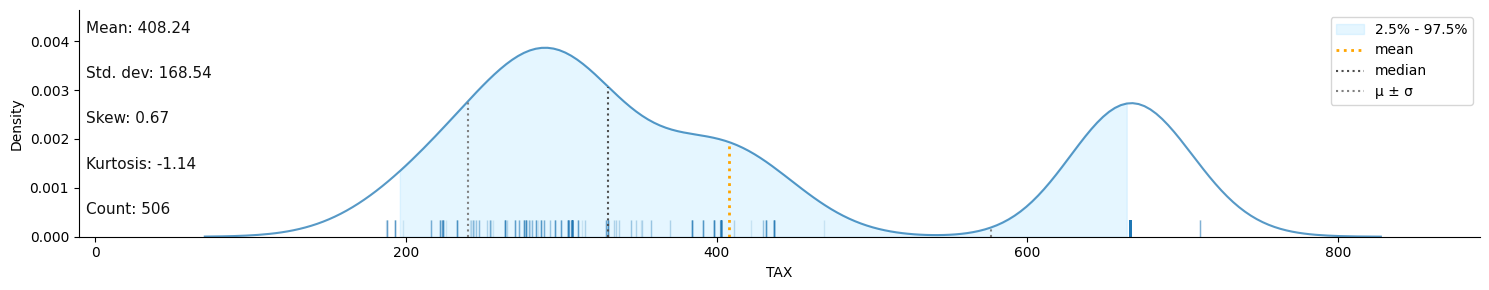

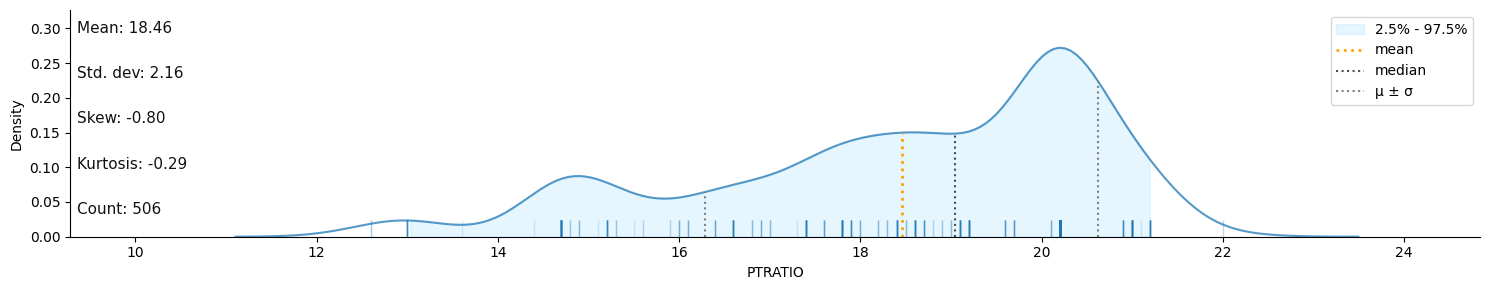

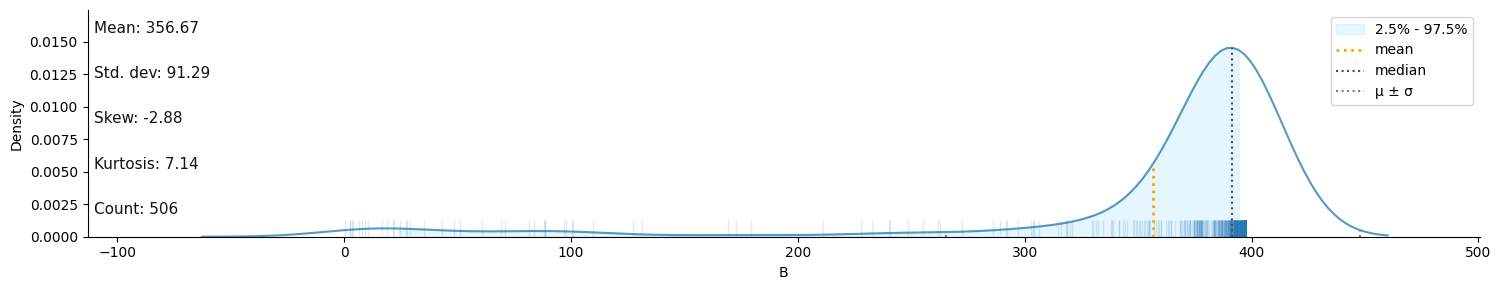

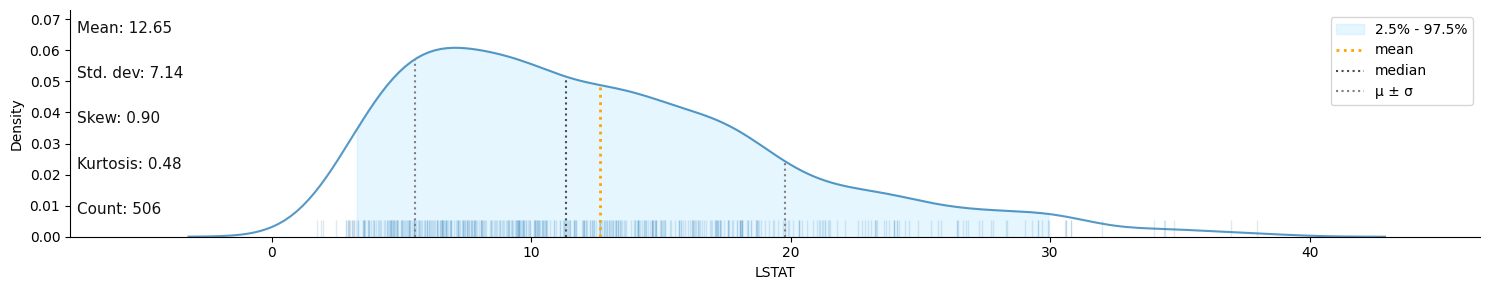

In [55]:
x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for x in x_vars:
  klib.dist_plot(data[x])

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame
# Replace this with your actual data or load your dataset

# Specify the variables to standardize
x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a copy of the DataFrame to keep the original data
df_standardized = data.copy()

# Standardize the specified variables
scaler = StandardScaler()
df_standardized[x_vars] = scaler.fit_transform(data[x_vars])

# Display the standardized DataFrame
print(df_standardized.head())


       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  24.0  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  21.6  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  34.7  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  33.4  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  36.2  


#

In [57]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
# Replace this with your actual data or load your dataset

# Specify the variables for which to calculate VIF
x_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Create a DataFrame containing only the specified x_vars
x_data = df_standardized[x_vars]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_vars
vif_data["VIF"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]

# Display the VIF values
print(vif_data)


   Variable       VIF
0      CRIM  1.792192
1        ZN  2.298758
2     INDUS  3.991596
3      CHAS  1.073995
4       NOX  4.393720
5        RM  1.933744
6       AGE  3.100826
7       DIS  3.955945
8       RAD  7.484496
9       TAX  9.008554
10  PTRATIO  1.799084
11        B  1.348521
12    LSTAT  2.941491


In [58]:
from sklearn.model_selection import train_test_split
X = df_standardized.drop('MEDV',axis=1) # Independet variable
y = df_standardized['MEDV'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [59]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [60]:
# Finding interception and coefficients
print(lin_reg.intercept_)
print(list(lin_reg.coef_))



22.664532109740705
[-0.8773211710082711, 1.0836997906273527, 0.10258729418374302, 0.8382050670821005, -2.2835306751424094, 2.558048154897231, 0.13966743534856962, -3.177945753985881, 2.4021185755300003, -1.6636228168200353, -1.9263627137350028, 0.8782831078392545, -3.9875977548913135]


In [63]:
# sklearn regression module
y_pred_test = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_test, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  21.953471731537107
R square obtain for scikit learn library is : 0.745143064291957


In [64]:
y_pred_train = lin_reg.predict(X_train)

In [66]:
residuals = y_test.values-y_pred_test
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -0.653463211066631


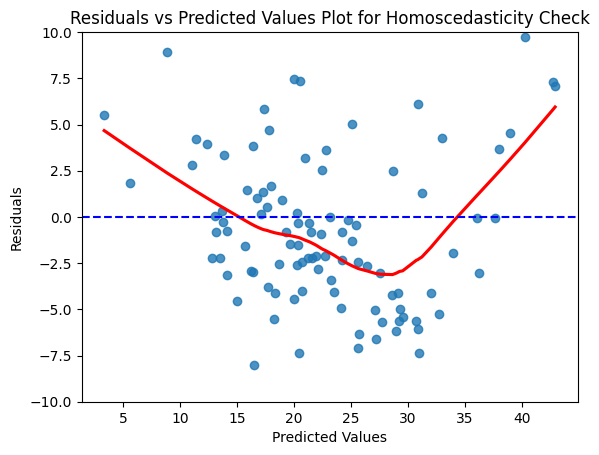

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_pred' and 'residuals' are your predicted values and residuals
# Replace these with your actual data

# Scatter plot with a regression line
p = sns.regplot(x=y_pred_test, y=residuals, lowess=True, line_kws={'color': 'red'})

# Customize plot labels and limits
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values Plot for Homoscedasticity Check')
plt.ylim(-10, 10)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='blue', linestyle='--')

# Show the plot
plt.show()


In [70]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, y_train)
lzip(name, test)

ValueError: not enough values to unpack (expected 2, got 1)

In [71]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import numpy as np

# Assuming 'y_train' is your target variable and 'y_pred' is your predicted values
# Replace these with your actual data

# Calculate residuals
residuals = y_train - y_pred_train

# Perform the Goldfeld-Quandt test for heteroscedasticity
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, np.column_stack((y_pred_test, y_train)))  # Assuming X_train is your exogenous variable
result = lzip(name, test)

print(result)


[('F statistic', 1.1191404361665926), ('p-value', 0.22051640590979785)]


<ipython-input-72-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


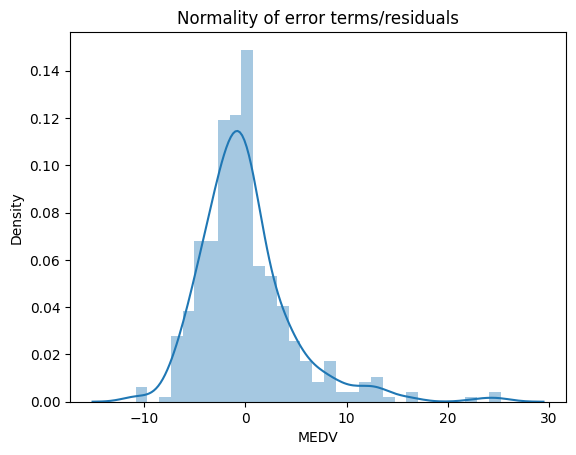

In [72]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Durbin-Watson statistic: 2.0361945218792727


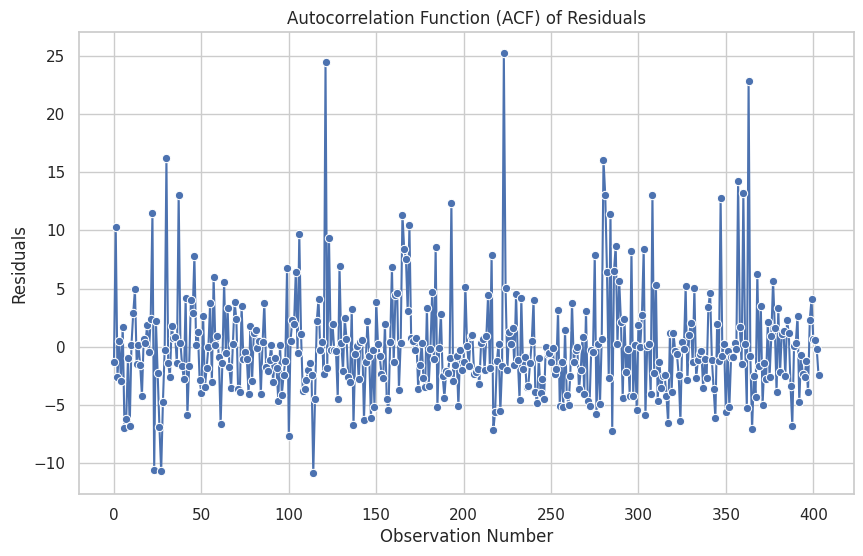

In [74]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.stattools as st

# Assuming 'y_train' is your target variable and 'y_pred' is your predicted values
# Replace these with your actual data

# Calculate residuals
residuals = y_train - y_pred_train

# Durbin-Watson test
durbin_watson_stat = st.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {durbin_watson_stat}')

# ACF plot of residuals
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(residuals)), y=residuals, marker="o")
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Observation Number')
plt.ylabel('Residuals')
plt.show()


